<a href="https://colab.research.google.com/github/lightucha/how-to-opencv/blob/main/opencv_210826.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 패캠 openCV ch04 Review 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print(cv2.__version__)

4.1.2


In [ ]:
gpath = '/content/drive/MyDrive/1.Project/{PATH}/'

### 필터링
영상에서 필요한 정보만 통과시키고 원치 않는 정보는 걸러내는 작업
필터링 종류
- 주파수 공간에서의 필터링(Frequency domain filtering)
- 공간적 필터링(Spatial domain filtering)
 - 영상의 픽셀 값을 직접 이용하는 필터링 방법
 - 마스크(mask) 연산을 이용(_mask_ = _kernel_ = _window_ = _template_)

마스크 형태에 따라 필터 역할이 결정
- 영상 부드럽게 만들기
- 영상 날카롭게 만들기
- 엣지(edge) 검출
- 잡음 제거

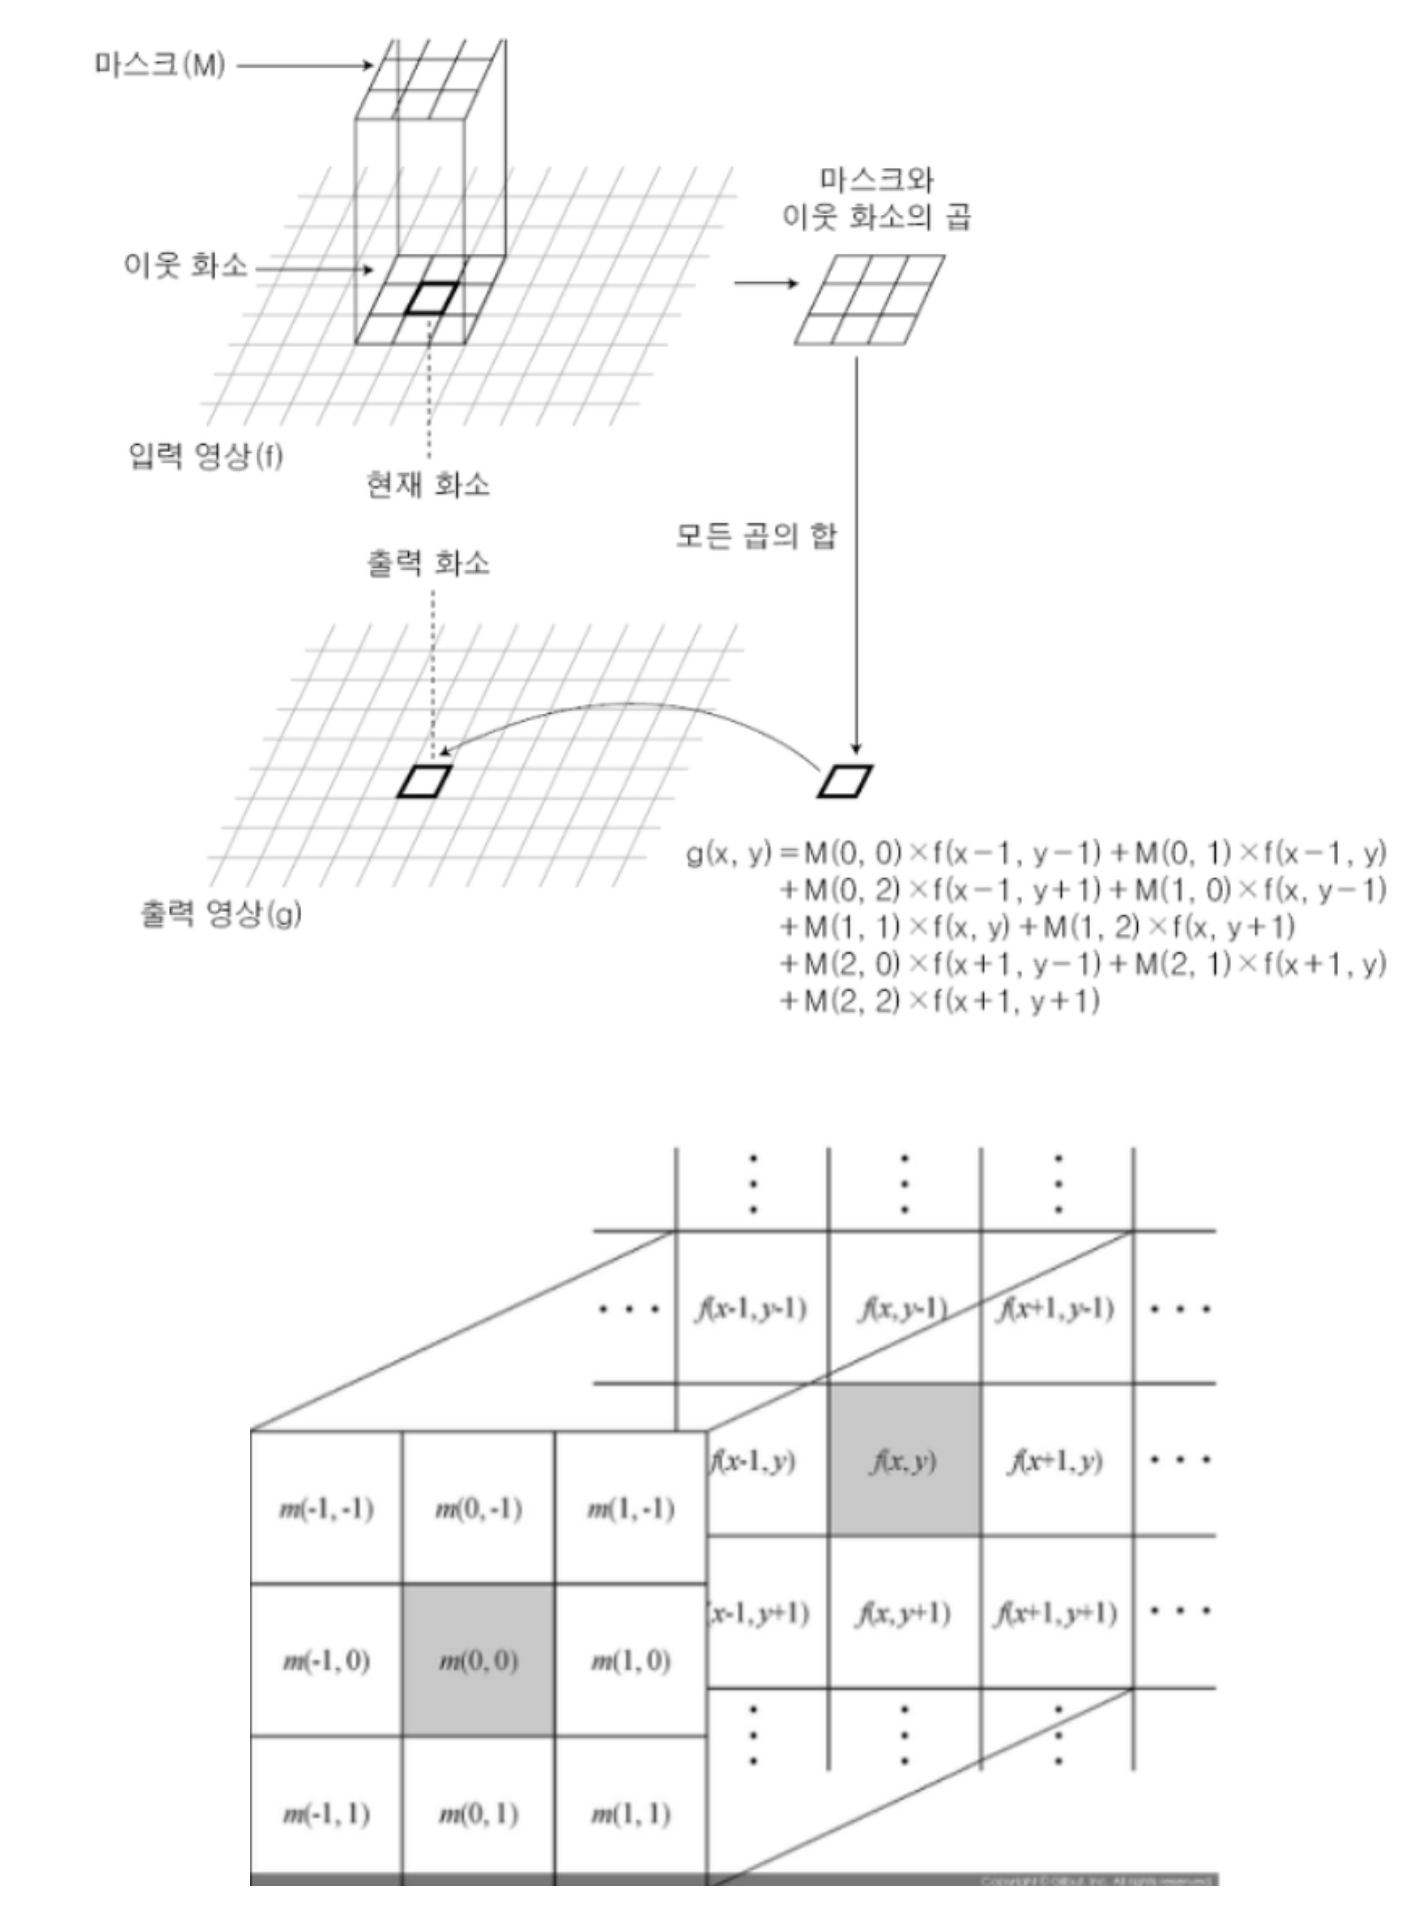

### 기본 필터링

<b>cv2.filter2D(src, ddepth, kernel, dst=None, anchor=None, delta=None, borderType=None)</b>
- ddepth: -1 지정 시 src와 같은 타입의 dst 생성

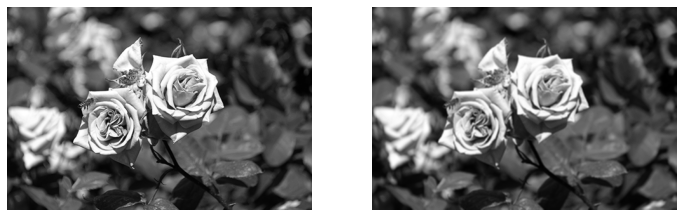

In [ ]:
src = cv2.imread(gpath + 'ch04/rose.bmp', cv2.IMREAD_GRAYSCALE)

# 필터 마스크 생성
kernel = np.ones((3, 3), dtype=np.float64) / 9. 
dst = cv2.filter2D(src, -1, kernel) # -1은 입력 영상과 동일한 데이터의 출력 영상 생성

plt.figure(figsize=(12, 8))
plt.subplot(121); plt.imshow(src, cmap='gray'); plt.axis('off')
plt.subplot(122); plt.imshow(dst, cmap='gray'); plt.axis('off')
plt.show()

### 블러링(1): 평균값 필터
- 영상의 특정 좌표 값을 주변 픽셀 값들의 산술 평균으로 설정
- 픽셀들 간의 스케일 값 변화가 줄어들어 엣지가 무뎌짐
</p>


<b>cv2.blur(src, ksize: (w, h), dst=None, anchor=None, borderType=None)</b>

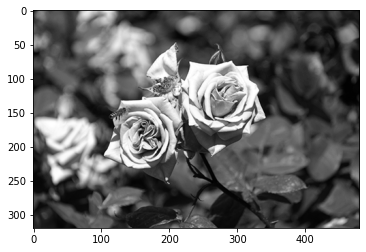

In [ ]:
src = cv2.imread(gpath+'ch04/rose.bmp', cv2.IMREAD_GRAYSCALE)

plt.imshow(src, cmap='gray')
plt.show()

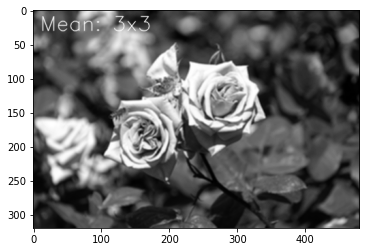

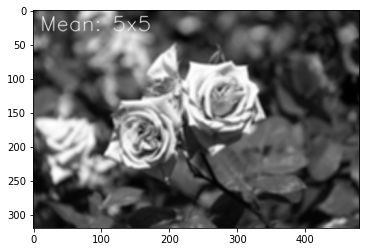

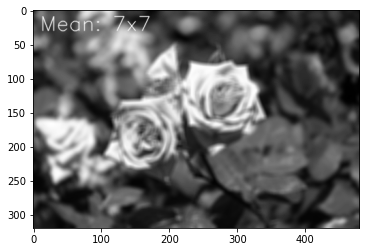

In [ ]:
# kernel size 별 블러링 확인

for ksize in (3, 5, 7):
  dst = cv2.blur(src, (ksize, ksize))
  desc = 'Mean: {}x{}'.format(ksize, ksize) 
  cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, 255, 1, cv2.LINE_AA) 
  plt.imshow(dst, cmap='gray')
  plt.show()

평균값 필터에 의한 블러링 단점
- 필터링 대상 위치에 상관없이 모두 같은 가중치를 사용
- 멀리 있는 픽셀의 영향을 많이 받을 수 있음

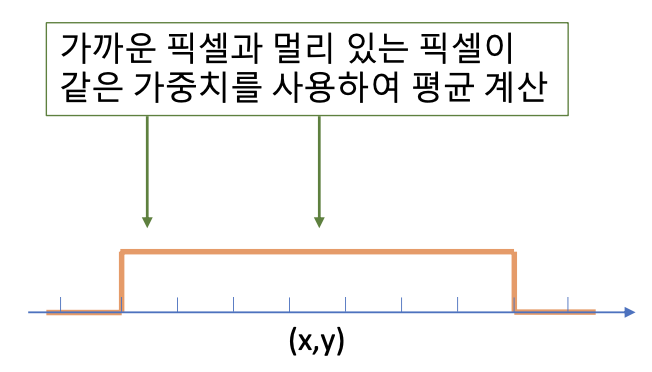

### 블러링(2): 가우시안 필터
가까운 픽셀은 큰 가중치를, 멀리 있는 픽셀은 작은 가중치를 사용하여 평균 계산

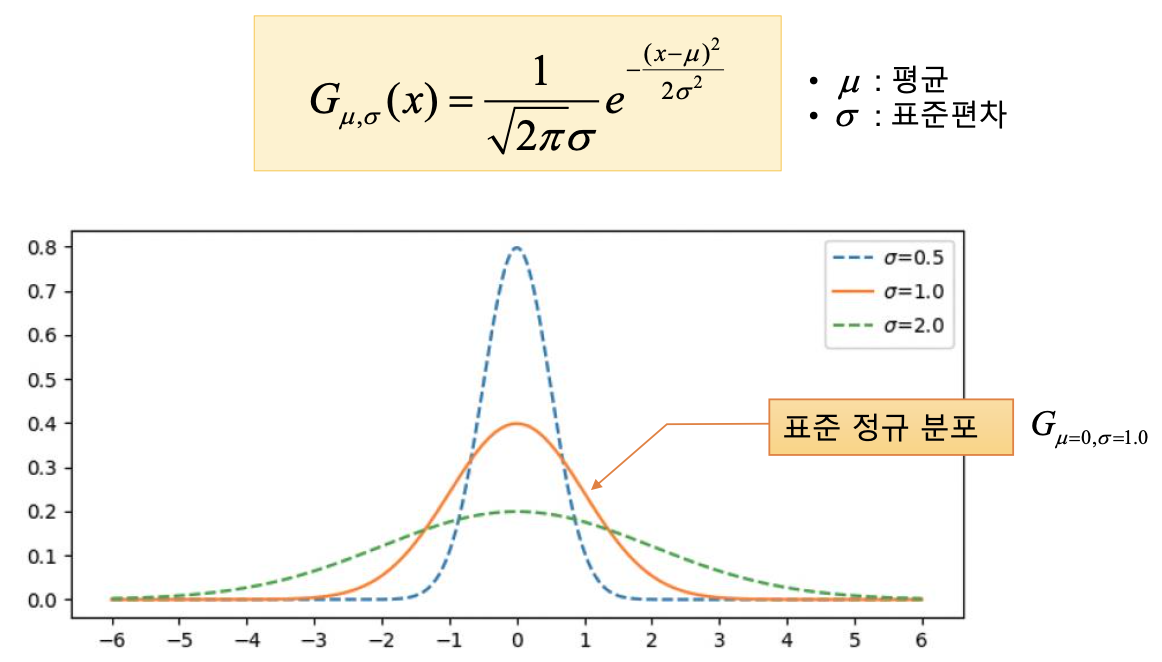

<b>cv2.GaussianBlur(src, ksize, sigmaX, dst=None, sigmaY=None, borderType=None)</b>

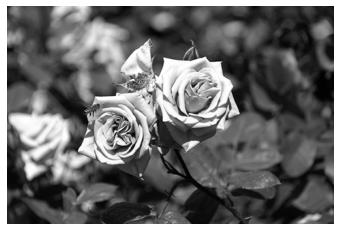

In [ ]:
plt.imshow(src, cmap='gray')
plt.axis('off')
plt.show()

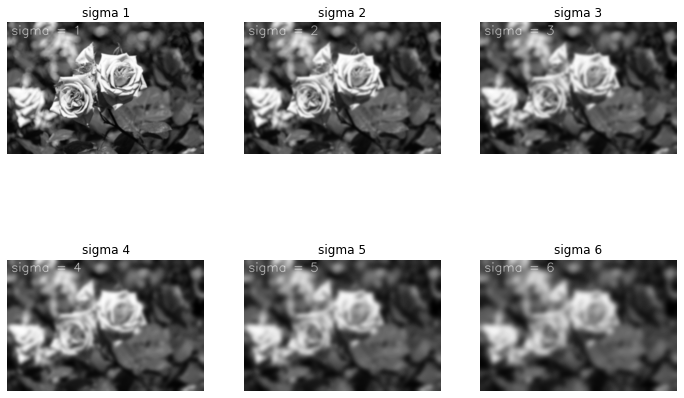

In [ ]:
plt.figure(figsize=(12,8))

for sigma in range(1, 7):
    dst = cv2.GaussianBlur(src, (0, 0), sigma)
    
    desc = 'sigma = {}'.format(sigma)
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, 255, 1, cv2.LINE_AA)
    
    plt.subplot(2,3,sigma)
    plt.imshow(dst, cmap='gray')
    plt.title(f'sigma {sigma}')
    plt.axis('off')

plt.show()

### 샤프닝: 언샤프 마스크 필터링
부드러운(unsharp) 영상을 이용하여 날카로운 영상을 생성
- $f(x)$ = 기존 영상의 픽셀<p>
- $\bar{f}(x)$ = 가우시안 필터가 적용된 픽셀<p>
- $g(x)$ = $f(x)$ - $\bar{f}(x)$<p>

언샤프 마스크 필터 $h(x)$,<p>
$h(x)$ = $f(x)$ + $g(x)$ = 2$f(x)$-$\bar{f}(x)$


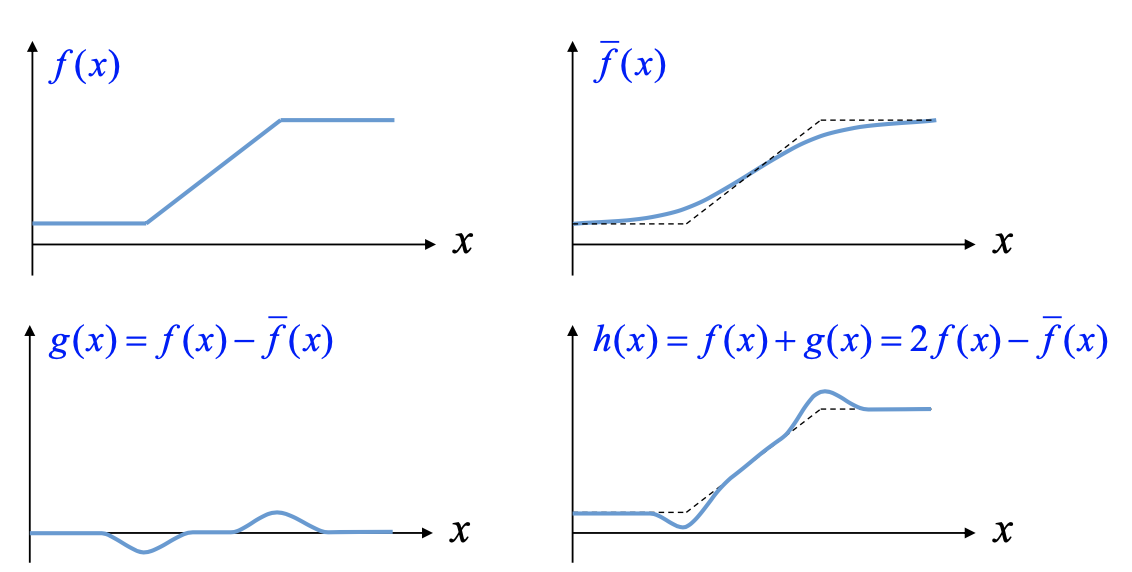

일반화: 샤프닝 정도를 조절<p>
$h(x,y)$ = f(x,y) + ${\alpha}$ $\centerdot$ $g(x,y)$

(-0.5, 479.5, 319.5, -0.5)

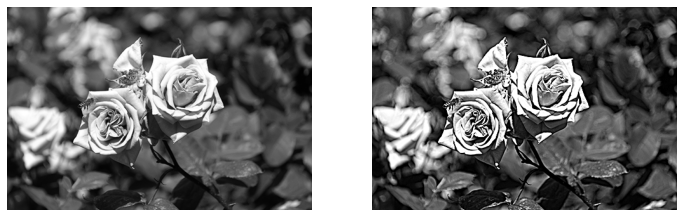

In [ ]:
src = cv2.imread(gpath+'ch04/rose.bmp', cv2.IMREAD_GRAYSCALE)

blr = cv2.GaussianBlur(src, (0, 0), 2) # 표준편차 2, 필터 크기는 자동 설정

a = 2.0 # 샤프닝 정도 결정하는 변수
dst = np.clip((1+a)*src - a * blr, 0, 255).astype(np.uint8) # 계산은 정수, 출력은 실수

# 결과 출력
plt.figure(figsize=(12,8))

plt.subplot(121); plt.imshow(src, cmap='gray'); plt.axis('off')
plt.subplot(122); plt.imshow(dst, cmap='gray'); plt.axis('off')

### 잡음 제거(1): 미디언 필터
영상의 잡음(Noise)
- 영상의 픽셀 값에 추가되는 원치 않는 형태의 신호

잡음의 종류
- 가우시안 잡음(Gaussian noise): 기존 픽셀값에서 
조금 어두워지거나 밝아짐
- 소금&후추 잡음(Salt&Pepper): 요즘은 거의 없는 잡음

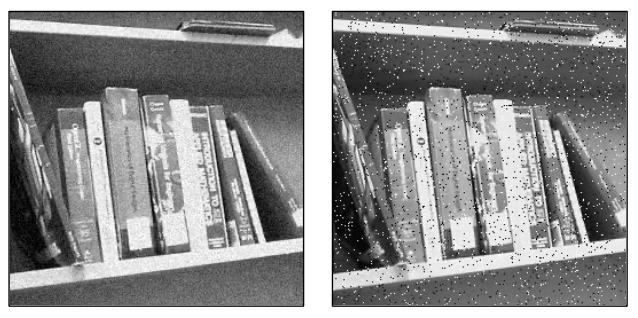

미디언 필터(Median filter)
- 중앙값(median)으로 픽셀 값 대체
- 소금&후추 잡음 제거에 효과적 (많이 사용되지는 않음)

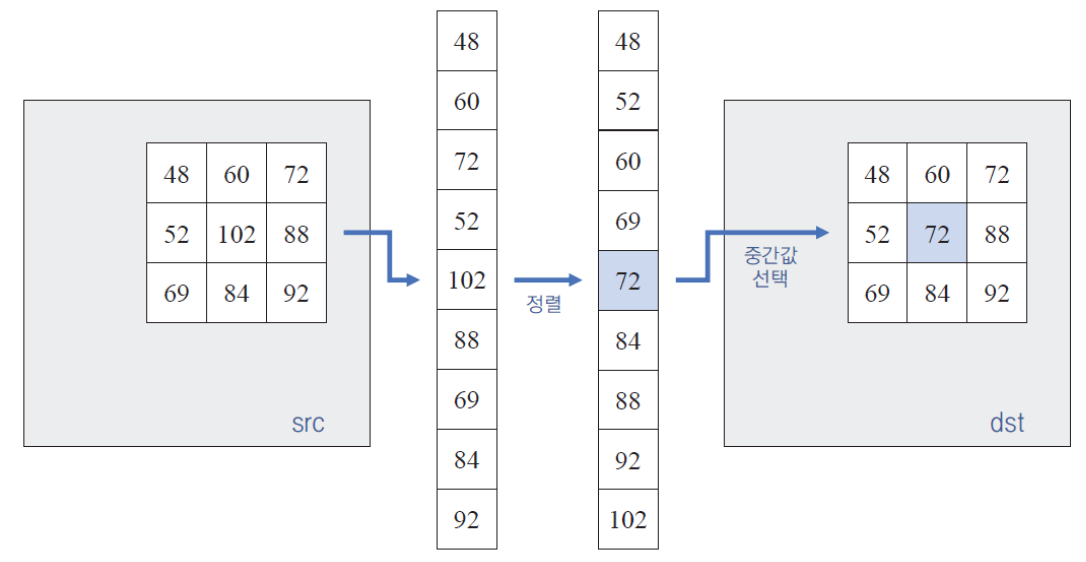

<b>cv2.medianBlur(src, ksize, dst=None)</b>

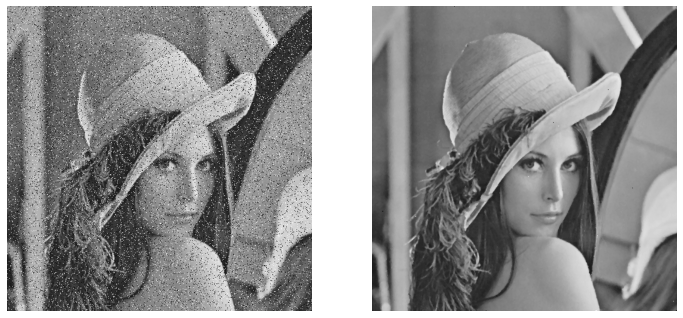

In [ ]:
src = cv2.imread(gpath + 'ch04/noise.bmp', cv2.IMREAD_GRAYSCALE) 
dst = cv2.medianBlur(src, 3)

plt.figure(figsize=(12,8))
plt.subplot(121); plt.imshow(src, cmap='gray'); plt.axis('off')
plt.subplot(122); plt.imshow(dst, cmap='gray'); plt.axis('off')
plt.show()

### 잡음 제거(2): 양방향 필터(Bilateral filter)
평균값 필터 및 가우시안 필터는 사용하게 되면 엣지 부분 훼손이 발생하게되는 단점이 있어 이를 보완하기 위해 양방향 필터 사용
- 엣지 보전 잡음 제거 필터(edge-preserving noise removala filter)
- 평탄한 부분은 필터 전체를 사용하고, 엣지 부분은 필터의 일부만 사용

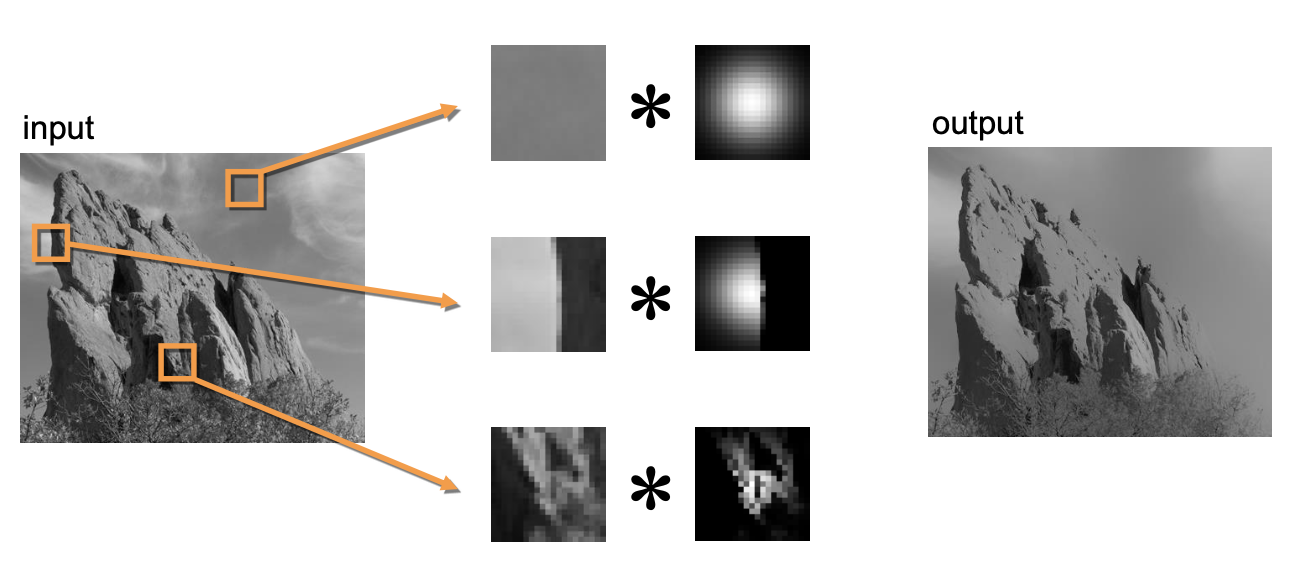

<b>cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace, dst=None, borderType=None)</b>
- d: 필터링에 사용될 이웃 픽셀의 거리(지름), 음수(-1) 입력 시 sigmaSpace 값에 따라 자동 결정

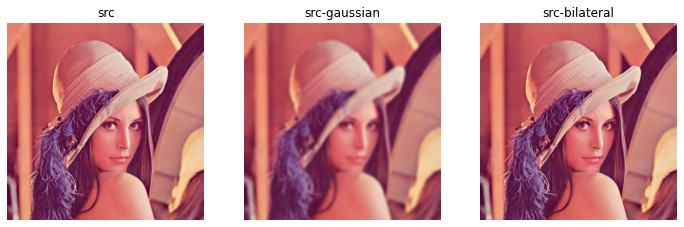

In [ ]:
src = cv2.imread(gpath+'ch04/lenna.bmp')
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
dst = cv2.bilateralFilter(src, -1, 10, 5)
gdst = cv2.GaussianBlur(src, (0, 0), 3)

plt.figure(figsize=(12,8))
plt.subplot(131); plt.imshow(src); plt.axis('off'); plt.title('src')
plt.subplot(132); plt.imshow(gdst); plt.axis('off'); plt.title('src-gaussian')
plt.subplot(133); plt.imshow(dst); plt.axis('off'); plt.title('src-bilateral')
plt.show()

끝.

In [ ]:
print('패캠 자료 787p 중 현재까지 {:.2f} % 리뷰 진행'.format(265/787 * 100))

패캠 자료 787p 중 현재까지 33.67 % 리뷰 진행
